# IMAGE CLASSIFICATION USING CNN (convolutional neural network)

classifying images of dataset cifar10 (tensorflow keras dataset)

**IMPORT FILES**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**GETTING DATASET**

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


**ANALYSING**

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

**FOR GETTING NAME**

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]       #types of images in the dataset

Plotting images

In [ ]:
def plotSample( X, y, index) :
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

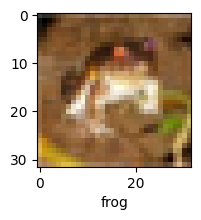

In [ ]:
plotSample(X_train, y_train, 0)

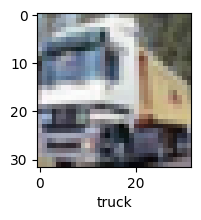

In [ ]:
plotSample(X_train, y_train, 1)

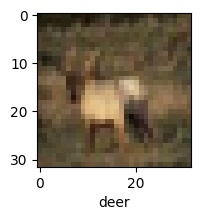

In [ ]:
plotSample(X_train, y_train, 3)


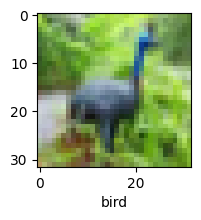

In [ ]:
plotSample(X_train, y_train, 6)

**NORMALIZING**

In [ ]:
X_train = X_train/255
X_test = X_test/255

**ARTIFICIAL NEURAL NETWORK** for image classification

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),                                           #10 categories to be defined
])

ann.compile(optimizer = 'SGD',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.8131 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6238 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.5432 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.4847 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4323 - accuracy: 0.4972


We can see accuracy here is around 49% ^

**Classification Report for ANN** (artificial neural network)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 15s 48ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.67      0.53      1000
           1       0.64      0.54      0.58      1000
           2       0.38      0.26      0.31      1000
           3       0.38      0.25      0.30      1000
           4       0.35      0.53      0.42      1000
           5       0.58      0.20      0.29      1000
           6       0.45      0.61      0.52      1000
           7       0.48      0.63      0.54      1000
           8       0.54      0.64      0.59      1000
           9       0.66      0.39      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



**CNN** ( convolutional neural networks to train images )

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4718 - accuracy: 0.4735
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1249 - accuracy: 0.6060
Epoch 3/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.9957 - accuracy: 0.6522
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9145 - accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8514 - accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7962 - accuracy: 0.7241
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7456 - accuracy: 0.7407
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7043 - accuracy: 0.7517
Epoch 9/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6678 - accuracy: 0.7669
Epoch 10/10
1563/1563 [==============================] - 75s 48m

CNN gives better accuracy of 70% and above as compared to ANN ^

TESTING CNN ON TEST SET

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9055 - accuracy: 0.6983


[0.9054834842681885, 0.6983000040054321]

**PREDICTING TEST CASES**

In [ ]:
y_test = y_test.reshape(-1,)

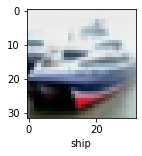

In [ ]:
plotSample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.54924458e-02, 1.11034409e-04, 4.78473445e-03, 5.73645473e-01,
        1.34098977e-01, 1.21116638e-01, 1.03704013e-01, 1.02702377e-03,
        4.30538654e-02, 2.96572316e-03],
       [2.82069668e-02, 2.96244860e-01, 5.99432587e-06, 3.69601082e-07,
        2.90813844e-08, 1.02203144e-08, 3.09669673e-07, 3.48838025e-09,
        6.70888841e-01, 4.65260539e-03],
       [2.41459385e-01, 2.71795541e-01, 9.92067042e-04, 3.54306540e-03,
        8.98484723e-04, 2.66734569e-04, 1.04542858e-04, 3.03665322e-04,
        4.35300648e-01, 4.53358591e-02],
       [8.60234320e-01, 2.38616709e-02, 1.77794788e-03, 4.78198082e-04,
        3.72928777e-03, 2.07344128e-05, 6.36707875e-04, 5.56732084e-05,
        1.08616605e-01, 5.88859897e-04],
       [3.08953749e-05, 8.42628378e-06, 8.96460749e-03, 8.50738212e-03,
        5.60592890e-01, 2.45161122e-04, 4.19893295e-01, 3.65046230e-06,
        1.75034150e-03, 3.34385845e-06]], dtype=float32)

**COMPARING THE ACCURACY OF OUTPUT**

In [ ]:
y_classes  = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

We can see that first 4 predictions were correct in 5 ^

**Wrong and Correct predictions**

CORRECT:

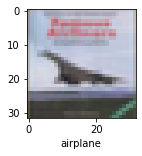

In [ ]:
plotSample( X_test, y_test, 3)

In [ ]:
classes[y_classes[3]]

'airplane'

WRONG:

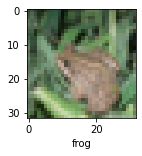

In [ ]:
plotSample( X_test, y_test, 4)

In [ ]:
classes[y_classes[4]]

'deer'